In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

Variables numéricas:

Una variable
        ○ Histograma
        ○ Boxplot

Dos variables
        ○ scatterplot

Variables categóricas:

Univariable
        ○ Countplot, pieplot

Bivariable
        ○ Barplot
Boxplot con hue

In [9]:
#Realizamos la carga del primer CSV
df_activity = pd.read_csv("files/Customer Flight Activity.csv")
#Realizamos la carga del segundo CSV
df_loyalty = pd.read_csv("files/Customer Loyalty History.csv")
#unimos ambos df en uno solo
Dfconjunto= df_activity.merge(df_loyalty,on=["Loyalty Number"])

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

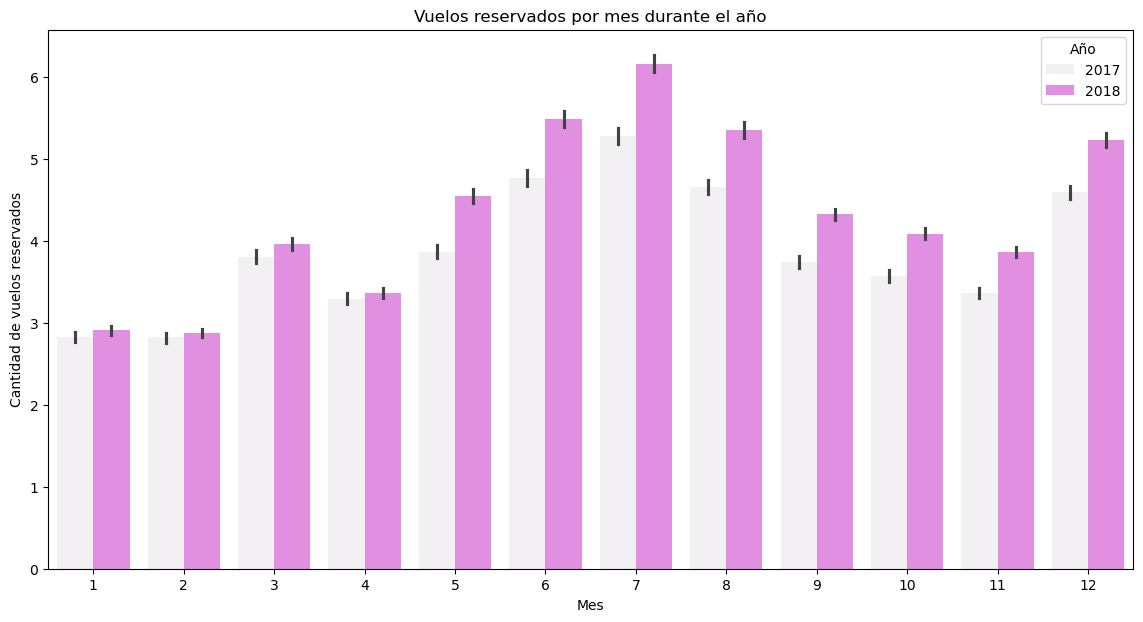

In [29]:
plt.figure(figsize=(14,7)) #queda más bonito si le metemos el size para que sea más grande. sino es más compacto
sns.barplot(data=Dfconjunto, x='Month', y='Flights Booked', hue='Year', palette= 'light:violet')
plt.title('Vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.legend(title='Año')
plt.show() # esto quita la leyenda, si no se le añade <matplotlib.legend.Legend at 0x2af11d6b9e0> al inicio

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

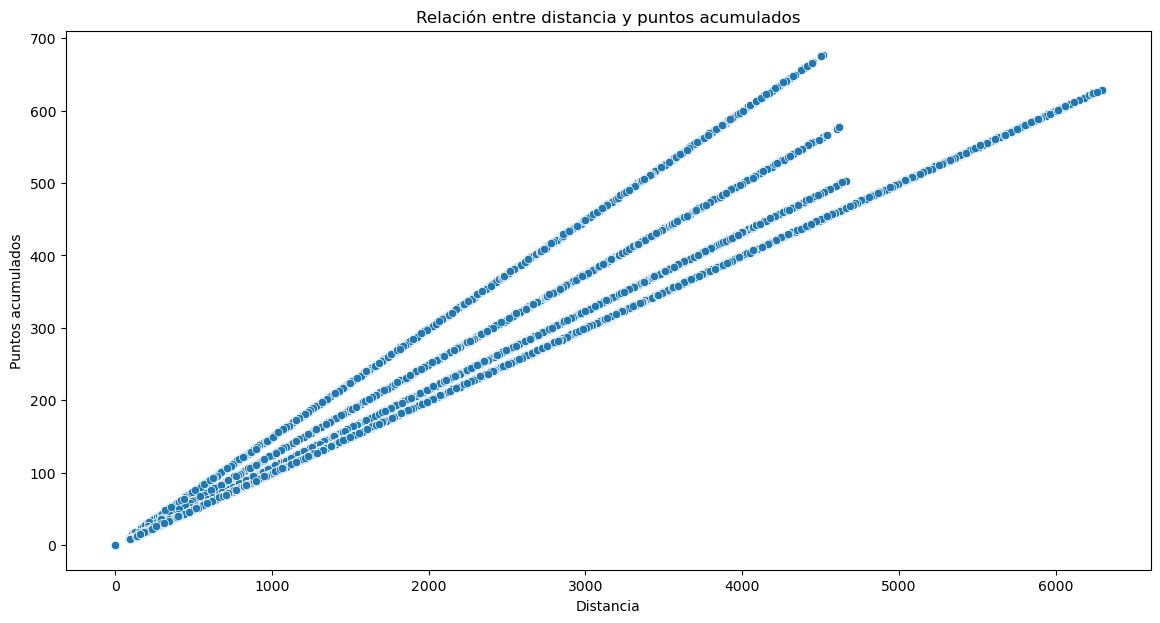

In [27]:

plt.figure(figsize=(14,7)) #queda más bonito si le metemos el size para que sea más grande. sino es más compacto
sns.scatterplot(data=Dfconjunto, x='Distance', y='Points Accumulated')
plt.title('Relación entre distancia y puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')
plt.show()

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [ ]:
#se droppean duplicados porque en Loyalty Number puede haber duplicados

Clientesnodupe = Dfconjunto.drop_duplicates(subset=['Loyalty Number'], keep='last')

In [ ]:
#sobre los no duplicados se hace un sort por provincia

Provincianos = Clientesnodupe.sort_values(by='Province')

In [ ]:
#conteo por provincia. Reset index para que quede como df

provinporclient = Provincianos['Province'].value_counts().reset_index()
provinporclient

,Province,count
0,Ontario,5404
1,British Columbia,4409
2,Quebec,3300
3,Alberta,969
4,Manitoba,658
5,New Brunswick,636
6,Nova Scotia,518
7,Saskatchewan,409
8,Newfoundland,258
9,Yukon,110


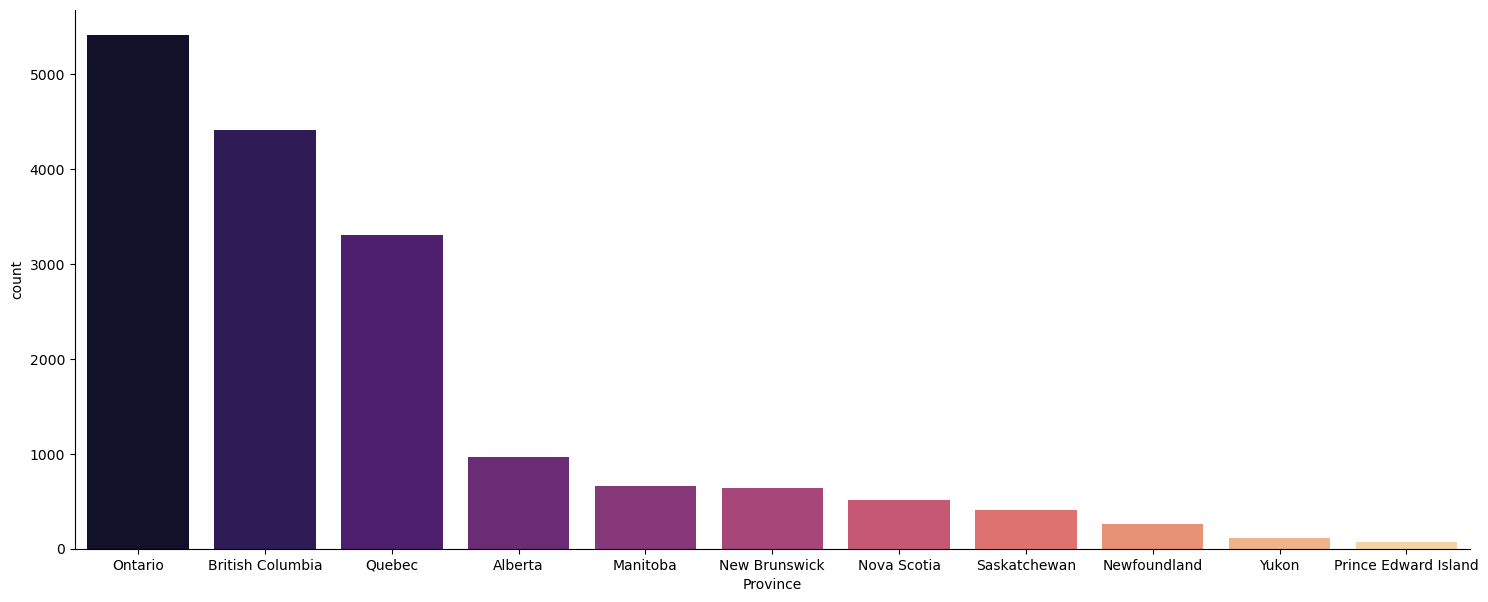

In [26]:
plt.figure(figsize=(18,7))
sns.barplot(data=provinporclient, x='Province', y='count', hue='Province', palette= 'magma')
sns.despine(top=True, right=True)

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [69]:
Clientesnodupe2 = Dfconjunto.drop_duplicates(subset=['Loyalty Number'], keep='last').reset_index()

In [70]:
Salariosnotnull = Dfconjunto.dropna(subset=['Salary']).reset_index()


In [71]:
totaldesalarioycli = Dfconjunto.drop_duplicates(subset=['Loyalty Number'], keep='last').dropna(subset=['Salary']).reset_index() 

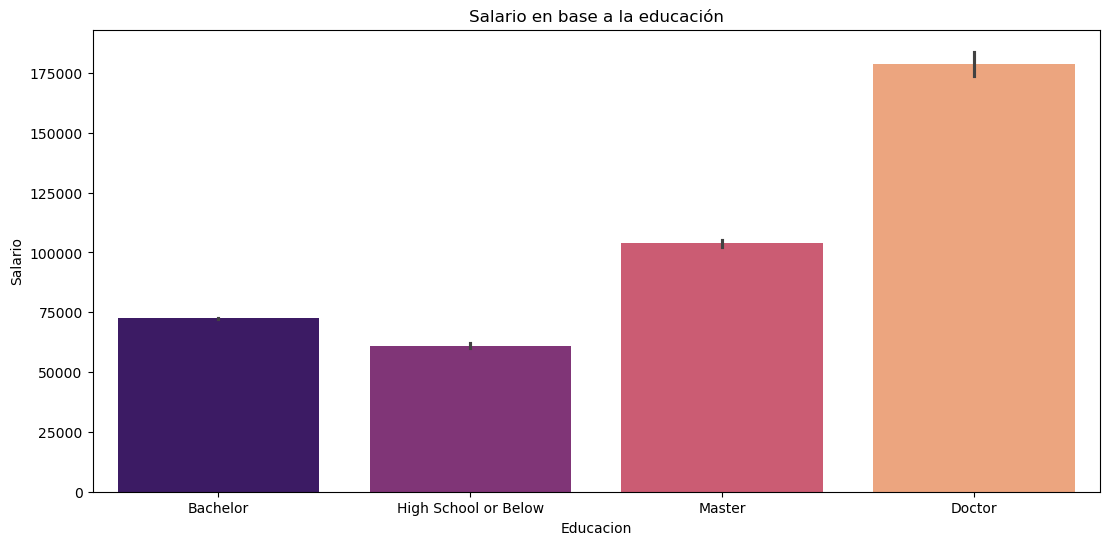

In [72]:
#nadie en colleage, así que no aparece porque estos datos ya han sido filtrados para no tener en cuenta ni duplicados en clientes ni el 25% de nulos de salario.

plt.figure(figsize=(13,6))
sns.barplot(data=totaldesalarioycli, x='Education', y='Salary',hue='Education', palette='magma')
plt.title('Salario en base a la educación')
plt.xlabel('Educacion')
plt.ylabel('Salario')
plt.show()

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [148]:
Clientesnodupe2 = Dfconjunto.drop_duplicates(subset=['Loyalty Number'], keep='last').reset_index()

In [149]:
educlinodupe = Clientesnodupe2.sort_values(by='Loyalty Card')

In [150]:
totalcliedu = educlinodupe['Loyalty Card'].value_counts(normalize=True)*100
totalcliedu = pd.DataFrame(totalcliedu).reset_index()

In [151]:
totalcliedu

,Loyalty Card,proportion
0,Star,45.629444
1,Nova,33.883014
2,Aurora,20.487543


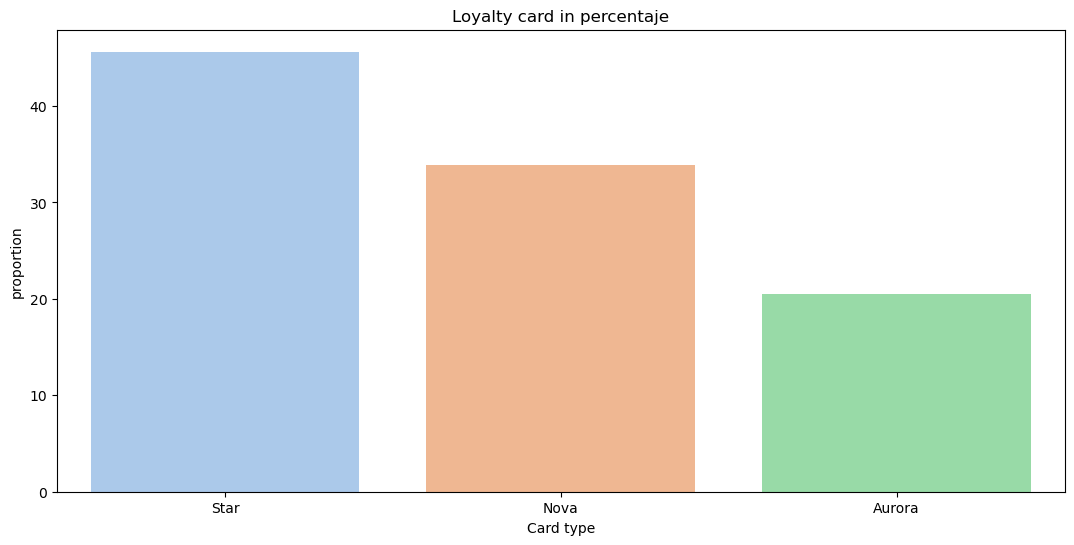

In [152]:
#este gráfico está bien, pero es mejor el pieplot, así que lo hago a continuación. 
#dejo este como forma alternativa de hacerlo.

plt.figure(figsize=(13,6))
sns.barplot(data=totalcliedu, x='Loyalty Card', y='proportion', hue='Loyalty Card', palette='pastel')
plt.title('Loyalty card in percentaje')
plt.xlabel('Card type')
plt.show()

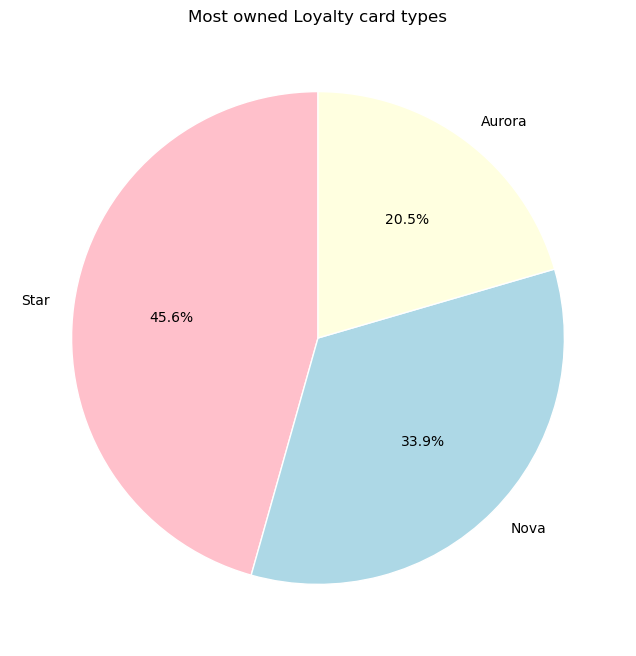

In [153]:
#pie 
#plt.pie(valores, labels, autopct, startangle, data, colors)
plt.figure(figsize=(8,8))
plt.pie(
        x=totalcliedu['proportion'], #meto x porque sino da error de que falta X si solo popngo labelsne necesito añadir la proportion
        labels=totalcliedu['Loyalty Card'], 
        autopct='%1.1f%%', 
        colors=['pink', 'lightblue','lightyellow'], 
        startangle=90,
        wedgeprops={'edgecolor': 'white'})
plt.title('Most owned Loyalty card types')
plt.show()

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [157]:
Clientesnodupe3 = Dfconjunto.drop_duplicates(subset=['Loyalty Number'], keep='last').reset_index()
Clientesnodupe3

,index,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,246,100504,2018,12,0,0,0,0,0.0,0,...,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,7,2018.0,3.0
1,684,101709,2018,12,0,0,0,0,0.0,0,...,Bachelor,66733.0,Single,Aurora,8396.61,Standard,2015,9,2018.0,8.0
2,998,101876,2018,12,0,0,0,0,0.0,0,...,College,NaN,Single,Aurora,4949.53,Standard,2017,10,2018.0,6.0
3,1332,105251,2018,12,0,0,0,0,0.0,0,...,Bachelor,80885.0,Married,Star,5074.25,Standard,2014,10,2017.0,8.0
4,1969,106509,2018,12,0,0,0,0,0.0,0,...,Bachelor,54529.0,Married,Nova,16727.77,Standard,2017,4,2018.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,405619,999902,2018,12,0,0,0,0,0.0,0,...,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
16733,405620,999911,2018,12,0,0,0,0,0.0,0,...,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
16734,405621,999940,2018,12,3,0,3,1233,123.0,0,...,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
16735,405622,999982,2018,12,0,0,0,0,0.0,0,...,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [183]:
clinodupegend = Clientesnodupe2.sort_values(by='Gender')
clinodupegend

,index,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,246,100504,2018,12,0,0,0,0,0.0,0,...,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,7,2018.0,3.0
9269,397279,556649,2018,12,8,0,8,1832,183.0,0,...,College,NaN,Married,Nova,5325.72,Standard,2012,12,NaN,NaN
9271,397283,556778,2018,12,2,0,2,2684,268.0,0,...,Doctor,269695.0,Married,Star,2387.61,Standard,2013,8,NaN,NaN
9272,397284,556808,2018,12,0,0,0,0,0.0,0,...,Bachelor,84901.0,Married,Star,2592.44,Standard,2016,8,NaN,NaN
9274,397286,556879,2018,12,17,7,24,1824,182.0,0,...,Bachelor,48909.0,Married,Aurora,7882.99,Standard,2018,7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,390352,187887,2018,12,2,0,2,1394,139.0,0,...,Bachelor,90480.0,Married,Aurora,10633.50,Standard,2015,1,NaN,NaN
3420,390351,187876,2018,12,0,0,0,0,0.0,0,...,Bachelor,46607.0,Married,Nova,34611.38,Standard,2018,8,NaN,NaN
9863,397951,591476,2018,12,0,0,0,0,0.0,0,...,College,NaN,Married,Aurora,6105.80,Standard,2012,8,NaN,NaN
3419,390350,187838,2018,12,0,0,0,0,0.0,0,...,Master,74124.0,Married,Aurora,30591.61,Standard,2017,3,NaN,NaN


In [194]:
genclicounts = clinodupegend.groupby(['Gender', 'Marital Status']).size().reset_index() #gender no se puede sacar
genclicounts

,Gender,Marital Status,0
0,Female,Divorced,1269
1,Female,Married,4869
2,Female,Single,2272
3,Male,Divorced,1249
4,Male,Married,4866
5,Male,Single,2212


In [189]:
print(genclicounts.columns)

Index(['Gender', 'Marital Status', 0], dtype='object')


In [203]:
genclicounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          6 non-null      object
 1   Marital Status  6 non-null      object
 2   0               6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


In [ ]:
#intentamos renombrar la columna del conteo
genclicounts = genclicounts.rename(columns={0: 'Count'})  #ES INT. SI SE INTENTAN CON CORCHETES FALLA PORQUE INTENTA CAMBIAR DESDE STRING

In [205]:
genclicounts

,Gender,Marital Status,Count
0,Female,Divorced,1269
1,Female,Married,4869
2,Female,Single,2272
3,Male,Divorced,1249
4,Male,Married,4866
5,Male,Single,2212


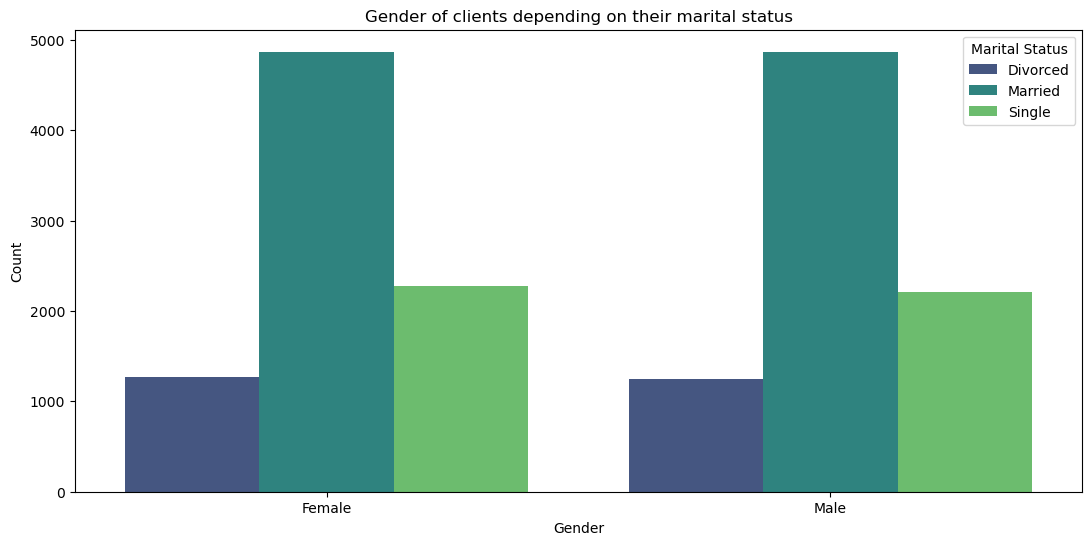

In [210]:
plt.figure(figsize=(13,6))
sns.barplot(data=genclicounts, x='Gender', y='Count', hue='Marital Status', palette='viridis')
plt.title('Gender of clients depending on their marital status')
plt.xlabel('Gender')
plt.show()

Conclusiones personales y/o recomendaciones basadas en los datos analizados tal y como se han revisado:

A nivel campaña:

-Hay gente que ha cancelado la membresía y que todavía le quedan puntos acumulados. Se les podría enviar un email de campaña para intentar recuperar a esos clientes indicándoles que todavía conservan sus puntos.

-En relacción a los Points Accumulated, se han transformado a INT y habrá ligeras diferencias en redondeo por este motivo dado que la conversión redondea hacia abajo. Se recomienda realizar un aviso a los clientes (o utilizar diferentes métodos para la conversión)

-Hay mucha menos gente de estos dos lugares que tengan membresía. Es de esperar ya que la población es mucho menor y no necesariamente tiene que representar un problema, sino una realidad poblacional:
Prince Edward Island y Yukon

Yukon tiene muy poca población, sin embargo tiene uno de los rates más altos de crecimiento poblacional. 
No centraría la atención ahí por lo de ahora, porque siento que sería malgastar recursos que pueden ir destinados a otras zonas como British Columbia, en donde la población es mucho mayor y también tiene un ratio de crecimiento elevado.

-No hay ningún miembro de Nunavut, sin embargo es uno de los territorios con más land area y tienen aeropuerto. Se podría intentar realizar un estudio de mercado para ver si saldrái rentable expandir el negocio a esa zona. 

Densidad de población de Canadá:
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=9810000101

Otra información que se ha visto:

-Revisando los nulos llegamos a la conclusión de que solamente un 12.35% de los clientes canceló la membresía, dado que entendemos los no-nulos como gente que ha cancelado membresía.
       No quitaría los clientes que hayan cancelado porque podrían regresar en cualquier momento, y además es información que tal vez nos interese tener para un análisis sobre retención de clientes (ej: en qué ciudad se han dado más de baja? Tal vez haya algo mal en una sede en específico que se tenga que revisar) 

-Un 25.32% de los clientes no tienen un salario añadido. Esto puede ser esperable dado que la gente podría ser reticente a compartir cierta información como en este caso el salario. Para las visualizaciones que incluyen salario (ej: 4) hemos quitado los nulos y hemos trabajado solo con los datos de clientes que sí han facilitado su salario. Es importante tener esto en cuenta ya que trabajamos con una muestra que incluiría el 74.68% de aquellos clientes que sí han facilitado el salario.

-El género femenino es el que tiene más presencia en el programa de lealtad.
-Hay más gente casada con membresía en el programa. La diferencia con el resto de estados maritales es considerable.
-Star es la loyalty card que más se ve (45.6%)
-Ontario(Toronto) destaca como lugar en el que hay más membresías.

-Hay gente que metió introdujo un código postal incorrecto. Se ha dejado la columna pero se han sustituído los valores incorrectos por nulos para que no den pie a confusiones y se puedan obviar en posibles visualizaciones futuras en las que el código postal sea relevante.

-Como curiosidad, hay gente que nunca ha volado si nos fijamos en total flights ya que hay gente con 0 en total.

-En enrollment type solo hay standard y una promo de 2018. no eliminamos la columna por tenerla para posibles comparativas de campaña en futuro, o por si se decide hacer algo con esa gente de 2018 de esa campaña.

-Todos los negativos en salario entraron en la promo de 2018, pero no todos los de esa promo tienen mal el salario. 
Cambiamos negativos a positivos ya que parece que son unas cifras que podrían haberse metido en negativo sin querer y solo hay 20 personas sobre el total que lo hayan introducido de esta manera. Hay bastante diferencia en los salarios para el mismo nivel de educación pero eso puede depender de muchos factores.

-Es normal que haya diferencia duplicados en loyalty, en loyalty es como base de datos de clientes así que no puede haber duplicados. Y en activity puede aparecer un cliente 27 veces si voló mucho.
No se borran duplicados por esta razón. Se entiende que está correcta.